# Impurity Prediction in Mined Ore | IME672A
>### Group - 2
>Prashant Sinha (18807542) <br>
>Prashant (180538) <br>
>Harsh Raj (18807280)<br>
>Shyam Bahmani (180756) <br>
>Desarda Rushabh (18807230) <br>

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set(style = 'white')
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [4]:
df = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv",decimal=",",parse_dates=["date"],infer_datetime_format=True)

In [5]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

In [7]:
df = df.drop_duplicates()
df.shape

(736282, 24)

In [8]:
df.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [9]:
feed = df.iloc[:,1:3]
important = df.iloc[:,3:8]
airFlow = df.iloc[:,8:15]
level = df.iloc[:,15:22]
pred = df.iloc[:,22:24]

Text(0, 0.5, 'Column AirFlow')

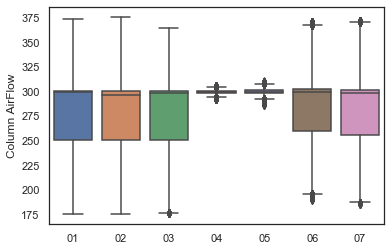

In [10]:
ax1 = sns.boxplot(data = airFlow)
ax1.set_xticklabels(["01","02","03","04","05","06","07"])
ax1.set_ylabel("Column AirFlow")

Text(0, 0.5, 'Column Levels')

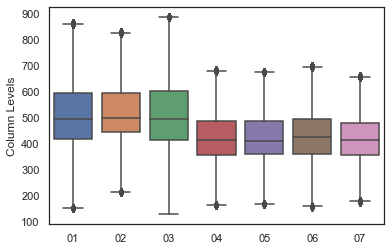

In [11]:
ax2 = sns.boxplot(data = level)
ax2.set_xticklabels(["01","02","03","04","05","06","07"])
ax2.set_ylabel("Column Levels")

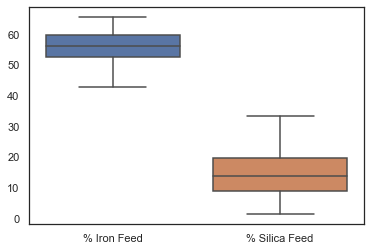

In [12]:
ax3 = sns.boxplot(data = feed)

In [13]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


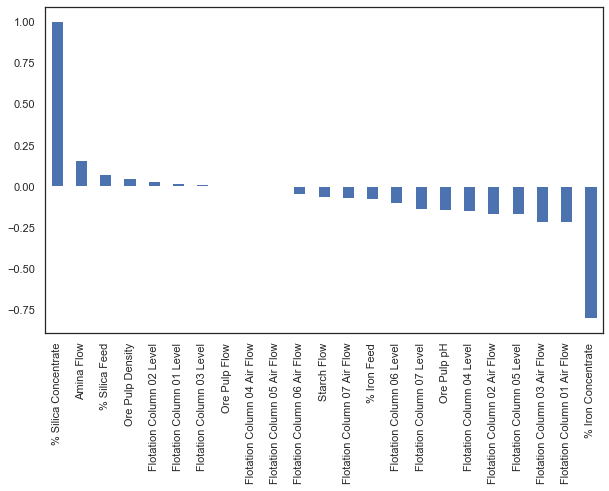

In [14]:
plt.figure(figsize=(10,6))
df.corr()['% Silica Concentrate'].sort_values(ascending=False).plot(kind='bar')

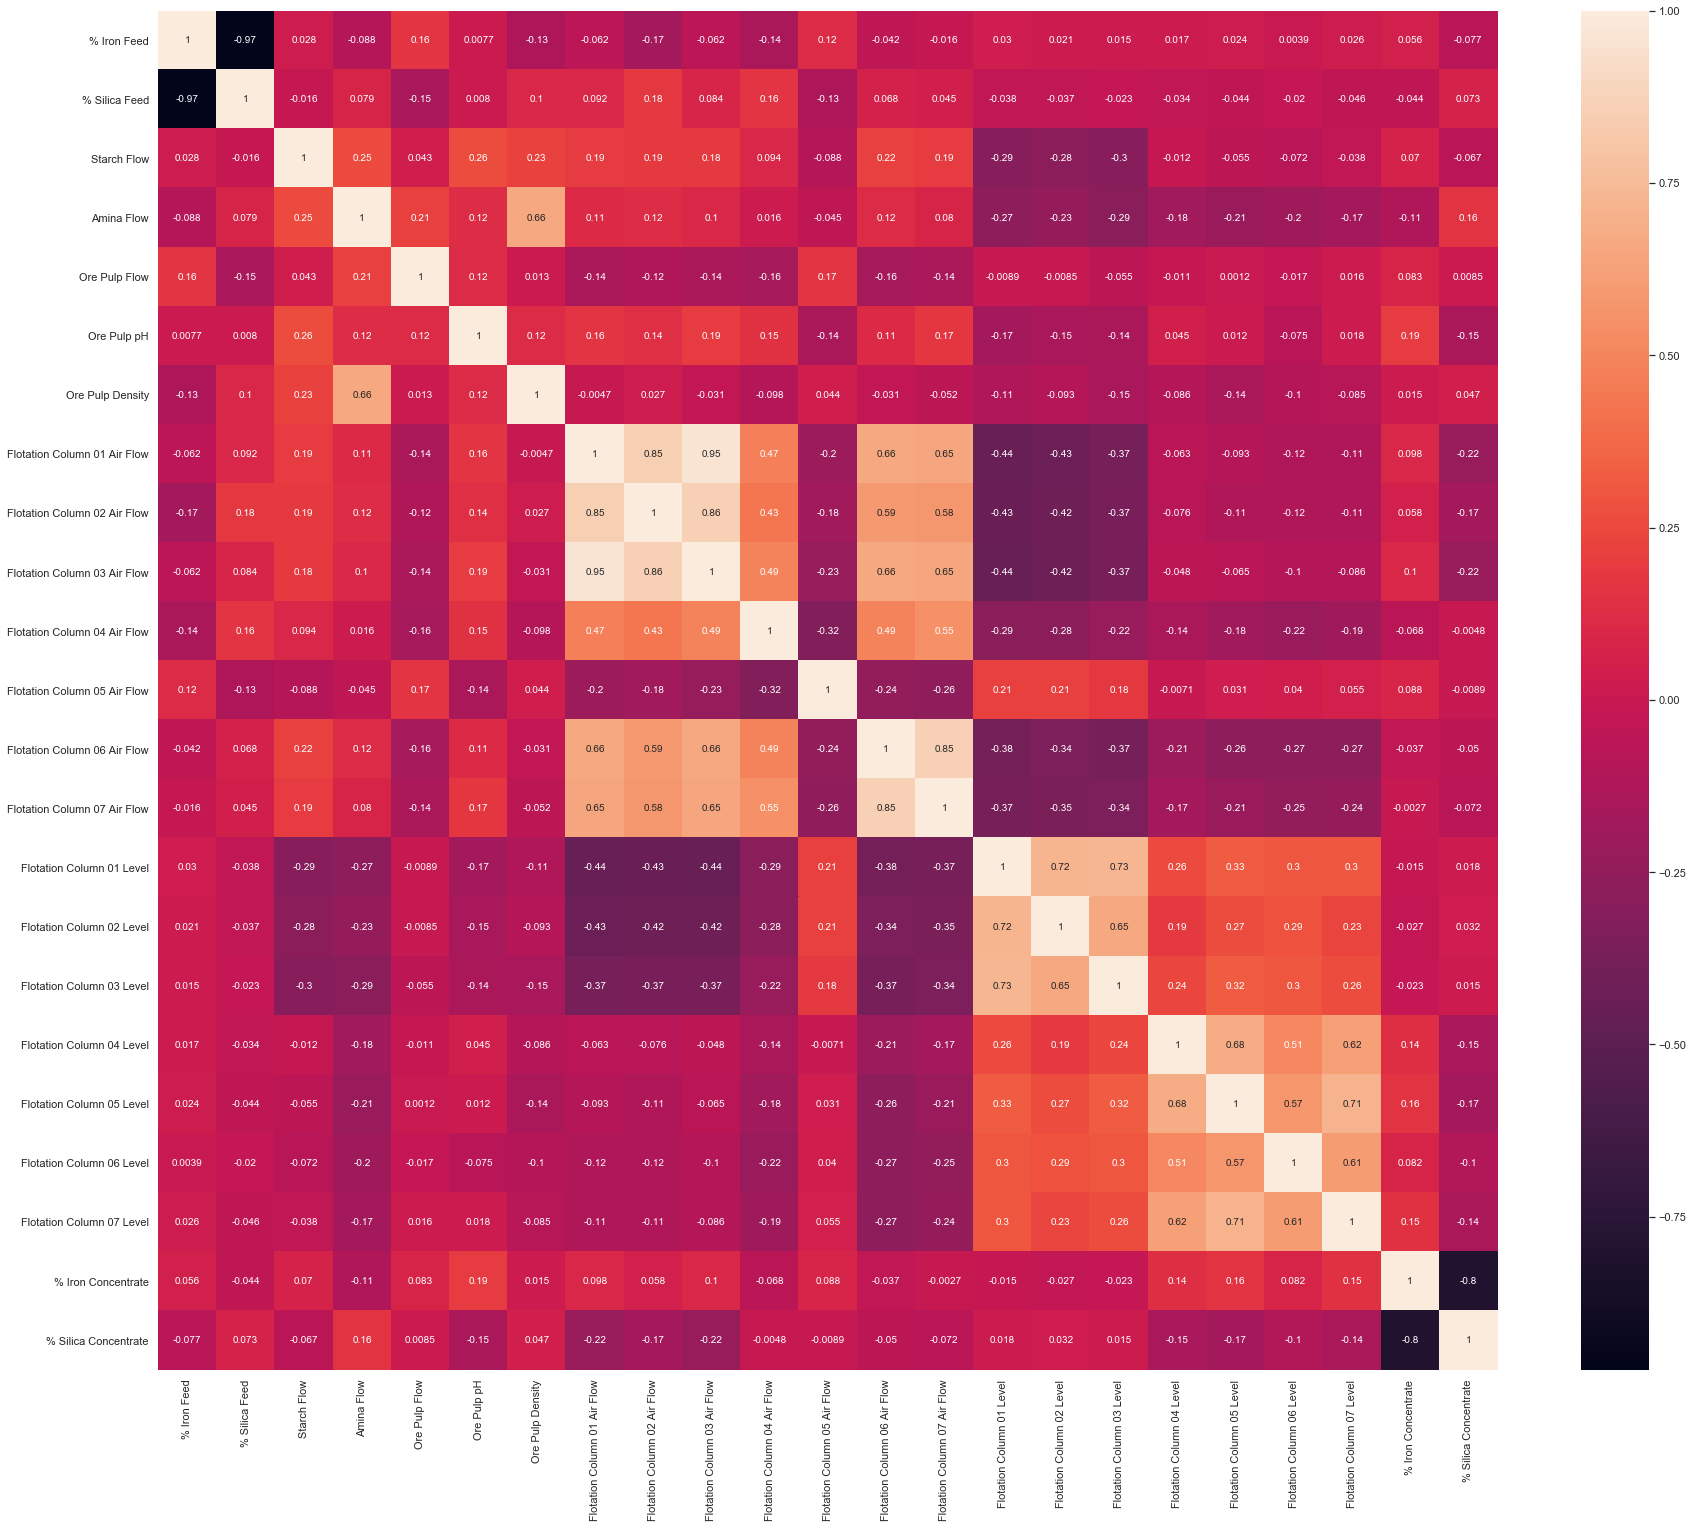

In [15]:
plt.figure(figsize=(30,25))
hm = sns.heatmap(df.corr(),annot=True)

['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', '% Iron Concentrate', '% Silica Concentrate']


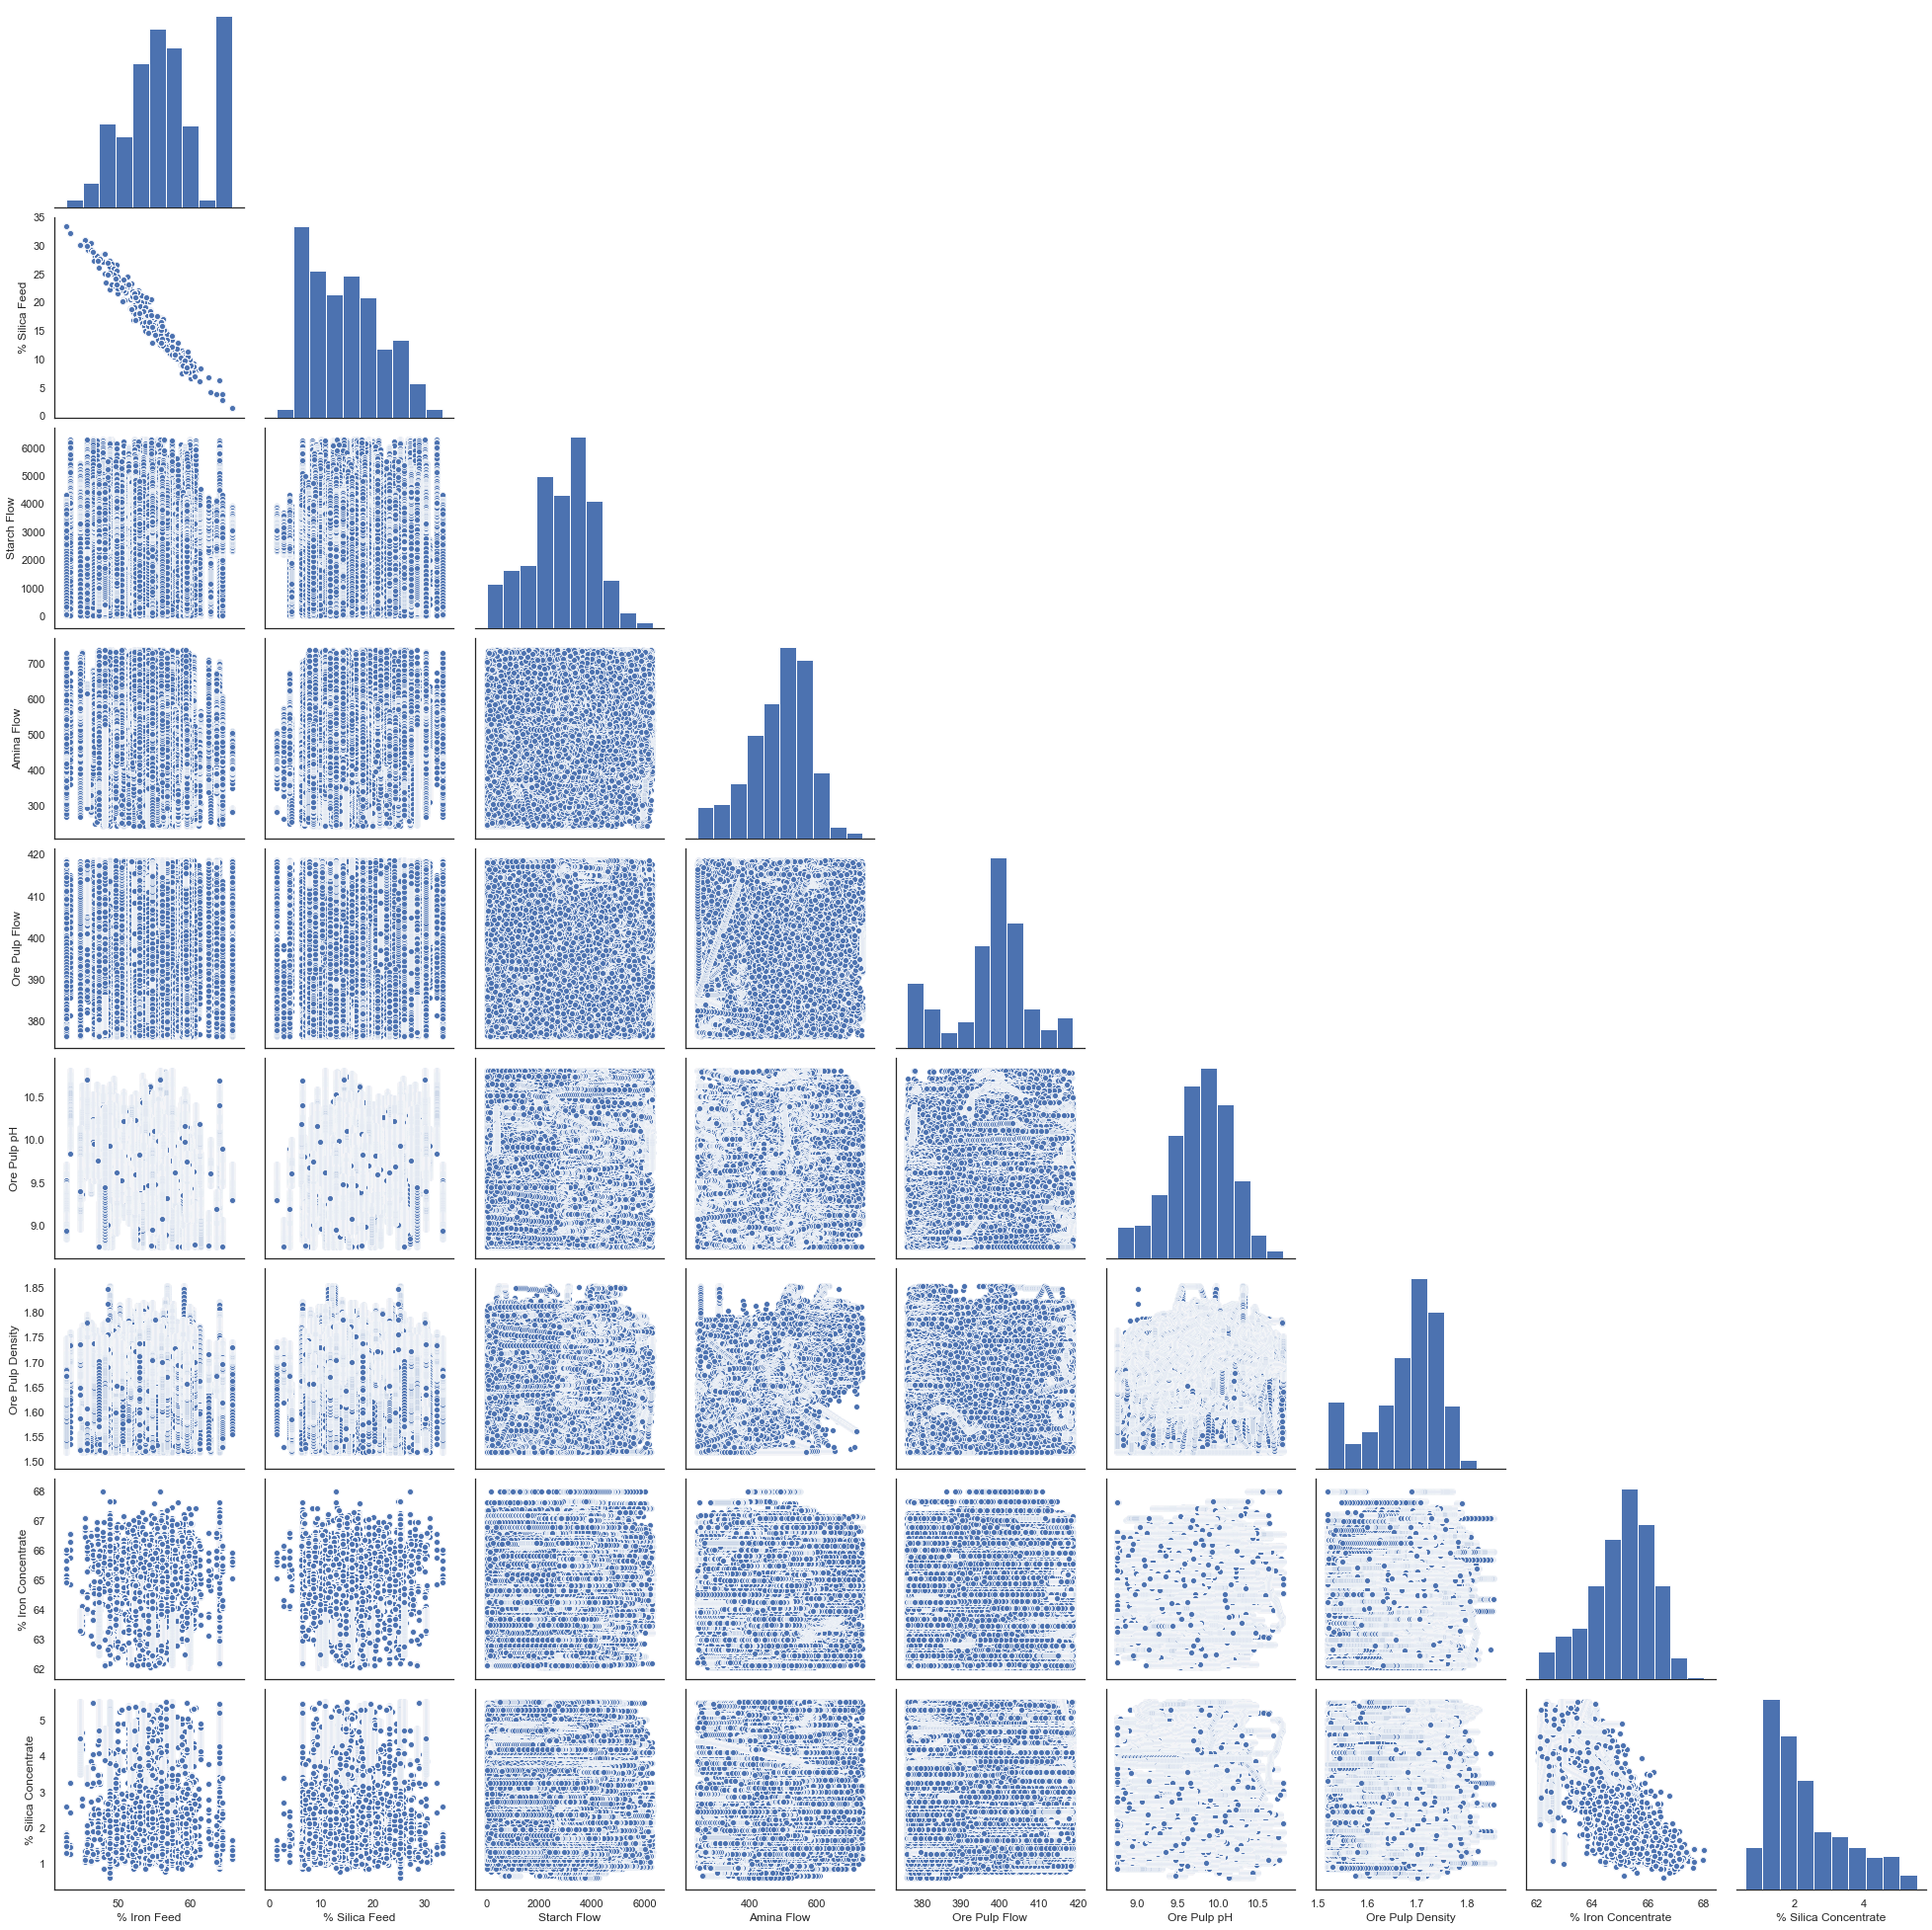

In [75]:
cols = list(df.columns[1:8])
cols.extend(df.columns[-2:])
print(cols)
ax=sns.pairplot(df.loc[:,cols], corner=True, height=3)

In [17]:
feed.corr()

,% Iron Feed,% Silica Feed
% Iron Feed,1.000000,-0.971876
% Silica Feed,-0.971876,1.000000


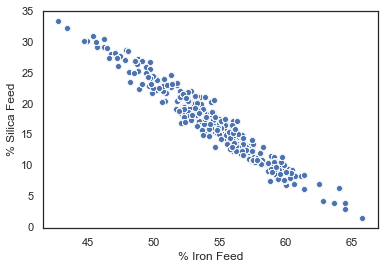

In [18]:
ax = sns.scatterplot(data=feed,x="% Iron Feed",y="% Silica Feed")

In [19]:
pred.corr()

,% Iron Concentrate,% Silica Concentrate
% Iron Concentrate,1.000000,-0.800598
% Silica Concentrate,-0.800598,1.000000


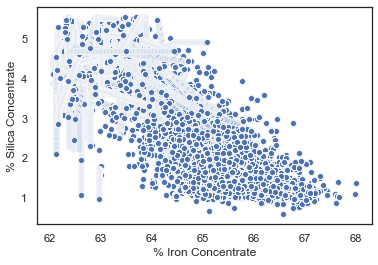

In [20]:
ax = sns.scatterplot(data=pred,x="% Iron Concentrate",y="% Silica Concentrate")

---
## Principal Component Analysis of Air Flow
---

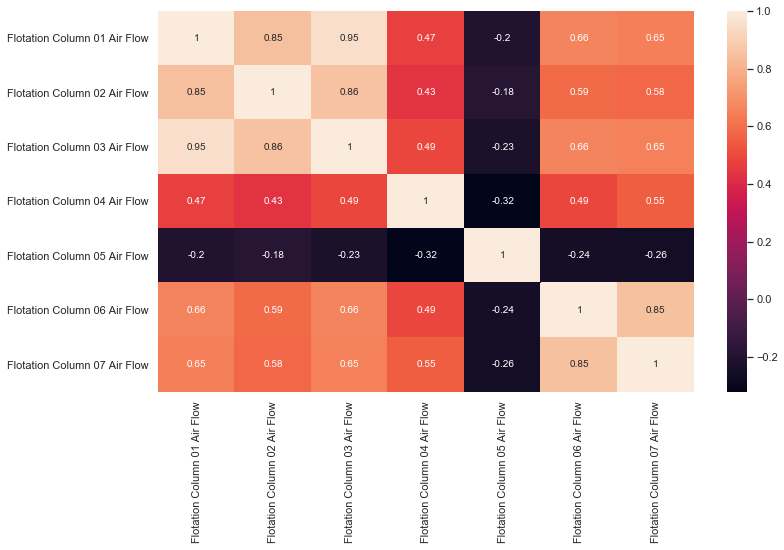

In [21]:
plt.figure(figsize=(12,7))
hm = sns.heatmap(airFlow.corr(),annot=True)

In [22]:
# Air flow 1-3 are highly correlated -> PCA Air Flow 1
# Air flow 4-5 are negatively correlated -> PCA Air Flow 2
# Air flow 6-7 are highly correlated -> PCA Air Flow 3
airFlowScaled1 = scale(airFlow.iloc[:,0:3])
airFlowScaled2 = scale(airFlow.iloc[:,3:5])
airFlowScaled3 = scale(airFlow.iloc[:,5:])

In [23]:
pca = PCA(n_components=1)
pcaAirFlow1 = pca.fit_transform(airFlowScaled1)
pcaAirFlow2 = pca.fit_transform(airFlowScaled2)
pcaAirFlow3 = pca.fit_transform(airFlowScaled3)

var = pca.explained_variance_ratio_
var

array([0.92704579])

In [24]:
pcaAirFlow = pd.DataFrame(data = pcaAirFlow1,columns = ["PCA Air Flow 1"])
pcaAirFlow['PCA Air Flow 2'] = pcaAirFlow2
pcaAirFlow['PCA Air Flow 3'] = pcaAirFlow3
pcaAirFlow.head()

,PCA Air Flow 1,PCA Air Flow 2,PCA Air Flow 3
0,1.678936,-2.45599,1.960631
1,1.713537,-2.45599,2.009270
2,1.773932,-2.45599,2.003772
3,1.652554,-2.45599,1.949543
4,1.693926,-2.45599,2.014497


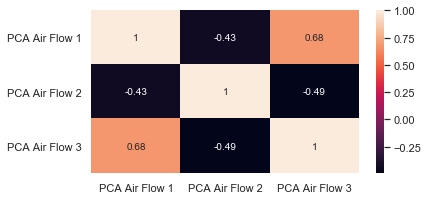

In [25]:
plt.figure(figsize=(6,3))
hm = sns.heatmap(pcaAirFlow.corr(),annot=True)

---
## Principal Component Analysis of Level
---

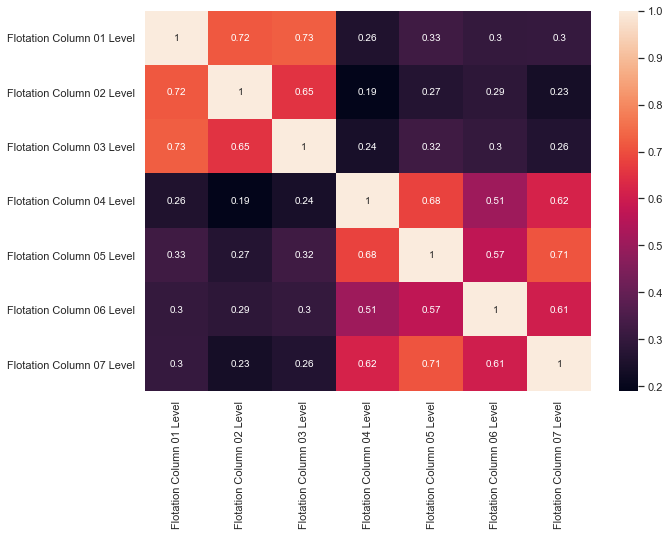

In [26]:
plt.figure(figsize=(10,7))
hm = sns.heatmap(level.corr(),annot=True)

In [27]:
# Level 1-3 can be clubbed in a single column
# Level 4-7 can be clubbed in another column
levelScaled1 = scale(level.iloc[:,0:3])
levelScaled2 = scale(level.iloc[:,3:])

In [28]:
pca1 = PCA(n_components=1)
pcaLevel1 = pca1.fit_transform(levelScaled1)
pcaLevel2 = pca1.fit_transform(levelScaled2)

var1 = pca1.explained_variance_ratio_
var1

array([0.7132523])

In [29]:
pca2 = PCA(n_components=2)
pcaLevel1 = pca2.fit_transform(levelScaled1)
pcaLevel2 = pca2.fit_transform(levelScaled2)

In [30]:
pcaLevel = pd.DataFrame(data = pcaLevel1,columns = ["PCA Level 1.1","PCA Level 1.2"])
pcaLevel2 = pd.DataFrame(data = pcaLevel2,columns = ["PCA Level 2.1","PCA Level 2.2"])
pcaLevel["PCA Level 2.1"] = pcaLevel2["PCA Level 2.1"]
pcaLevel["PCA Level 2.2"] = pcaLevel2["PCA Level 2.2"]
pcaLevel.head()

,PCA Level 1.1,PCA Level 1.2,PCA Level 2.1,PCA Level 2.2
0,1.083831,-0.007463,1.312343,-0.183747
1,1.093430,-0.061362,1.143928,-0.204352
2,0.914977,0.154693,0.847732,-0.173428
3,0.926126,0.055801,0.507921,-0.215997
4,0.920496,-0.008825,0.512332,-0.178874


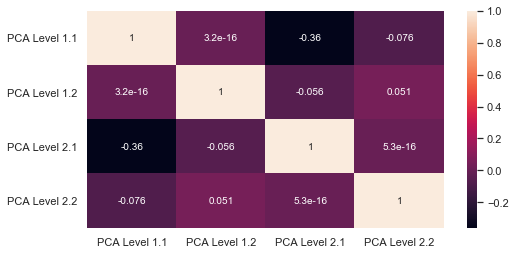

In [31]:
plt.figure(figsize=(8,4))
hm = sns.heatmap(pcaLevel.corr(),annot=True)

In [32]:
pcaAirLevel = pd.DataFrame(pcaAirFlow)
pcaAirLevel["PCA Level 1.1"] = pcaLevel["PCA Level 1.1"]
pcaAirLevel["PCA Level 1.2"] = pcaLevel["PCA Level 1.2"]
pcaAirLevel["PCA Level 2.1"] = pcaLevel["PCA Level 2.1"]
pcaAirLevel["PCA Level 2.2"] = pcaLevel["PCA Level 2.2"]

In [33]:
df2 = pcaAirLevel
df2 = pd.concat([pcaAirLevel, pred], axis=1)
df2.head()

,PCA Air Flow 1,PCA Air Flow 2,PCA Air Flow 3,PCA Level 1.1,PCA Level 1.2,PCA Level 2.1,PCA Level 2.2,% Iron Concentrate,% Silica Concentrate
0,1.678936,-2.45599,1.960631,1.083831,-0.007463,1.312343,-0.183747,66.91,1.31
1,1.713537,-2.45599,2.009270,1.093430,-0.061362,1.143928,-0.204352,66.91,1.31
2,1.773932,-2.45599,2.003772,0.914977,0.154693,0.847732,-0.173428,66.91,1.31
3,1.652554,-2.45599,1.949543,0.926126,0.055801,0.507921,-0.215997,66.91,1.31
4,1.693926,-2.45599,2.014497,0.920496,-0.008825,0.512332,-0.178874,66.91,1.31


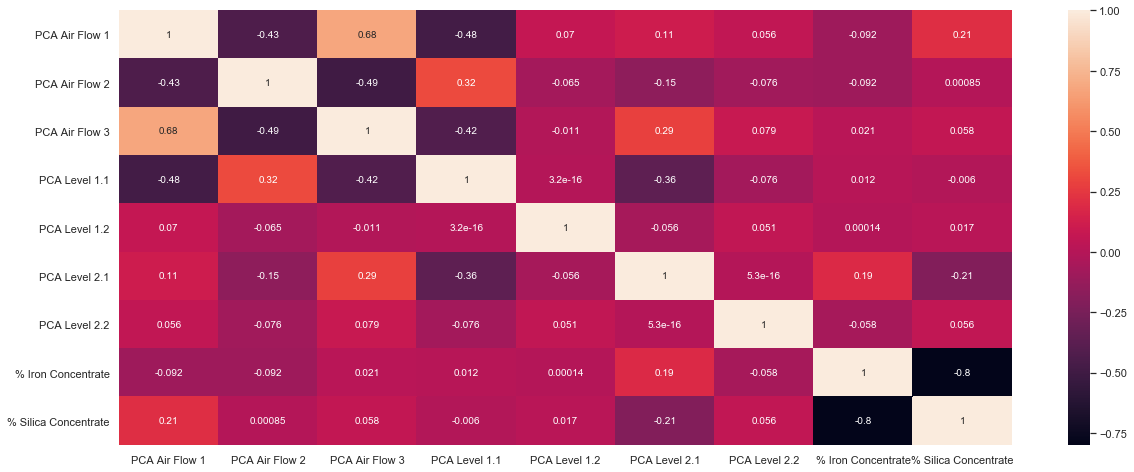

In [34]:
plt.figure(figsize=(20,8))
hm = sns.heatmap(df2.corr(),annot=True)

In [35]:
df3 = pd.concat([feed,important,df2], axis=1)
df3.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,PCA Air Flow 1,PCA Air Flow 2,PCA Air Flow 3,PCA Level 1.1,PCA Level 1.2,PCA Level 2.1,PCA Level 2.2,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,1.678936,-2.45599,1.960631,1.083831,-0.007463,1.312343,-0.183747,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,1.713537,-2.45599,2.009270,1.093430,-0.061362,1.143928,-0.204352,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,1.773932,-2.45599,2.003772,0.914977,0.154693,0.847732,-0.173428,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,1.652554,-2.45599,1.949543,0.926126,0.055801,0.507921,-0.215997,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,1.693926,-2.45599,2.014497,0.920496,-0.008825,0.512332,-0.178874,66.91,1.31


In [36]:
df3.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,PCA Air Flow 1,PCA Air Flow 2,PCA Air Flow 3,PCA Level 1.1,PCA Level 1.2,PCA Level 2.1,PCA Level 2.2,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,7.362820e+05,7.362820e+05,7.362820e+05,7.362820e+05,7.362820e+05,7.362820e+05,7.362820e+05,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,3.854376e-16,-7.152406e-17,-3.653647e-17,5.616542e-18,-3.224204e-17,4.323386e-17,2.740718e-17,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,1.666197e+00,1.149380e+00,1.361651e+00,1.548574e+00,5.885060e-01,1.689086e+00,7.159867e-01,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,-3.560208e+00,-3.520197e+00,-3.815451e+00,-4.212249e+00,-3.431273e+00,-5.381356e+00,-4.403835e+00,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,-1.216272e+00,-3.139689e-01,-5.000536e-01,-9.207671e-01,-9.076889e-02,-1.489625e+00,-3.121209e-01,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,-1.108031e+00,1.369786e-01,-3.772292e-01,3.534172e-01,2.959185e-02,-2.665173e-01,-5.776679e-02,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,1.696707e+00,5.488361e-01,8.065329e-01,1.086614e+00,1.663307e-01,1.276719e+00,2.331173e-01,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,6.019581e+00,3.712188e+00,4.723600e+00,4.407445e+00,3.614876e+00,5.747690e+00,4.693682e+00,68.010000,5.530000


In [37]:
df2.isnull().sum()

PCA Air Flow 1          1171
PCA Air Flow 2          1171
PCA Air Flow 3          1171
PCA Level 1.1           1171
PCA Level 1.2           1171
PCA Level 2.1           1171
PCA Level 2.2           1171
% Iron Concentrate      1171
% Silica Concentrate    1171
dtype: int64

In [38]:
df3=df3.dropna()

---

## Model Training
---

In [40]:
df3.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,PCA Air Flow 1,PCA Air Flow 2,PCA Air Flow 3,PCA Level 1.1,PCA Level 1.2,PCA Level 2.1,PCA Level 2.2,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,1.678936,-2.45599,1.960631,1.083831,-0.007463,1.312343,-0.183747,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,1.713537,-2.45599,2.009270,1.093430,-0.061362,1.143928,-0.204352,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,1.773932,-2.45599,2.003772,0.914977,0.154693,0.847732,-0.173428,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,1.652554,-2.45599,1.949543,0.926126,0.055801,0.507921,-0.215997,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,1.693926,-2.45599,2.014497,0.920496,-0.008825,0.512332,-0.178874,66.91,1.31


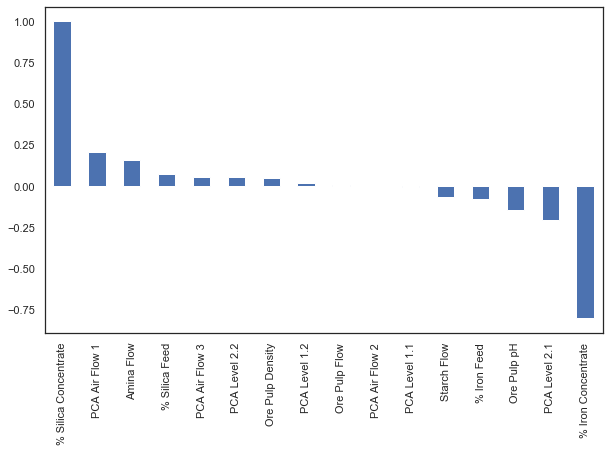

In [41]:
plt.figure(figsize=(10,6))
df3.corr()['% Silica Concentrate'].sort_values(ascending=False).plot(kind='bar')

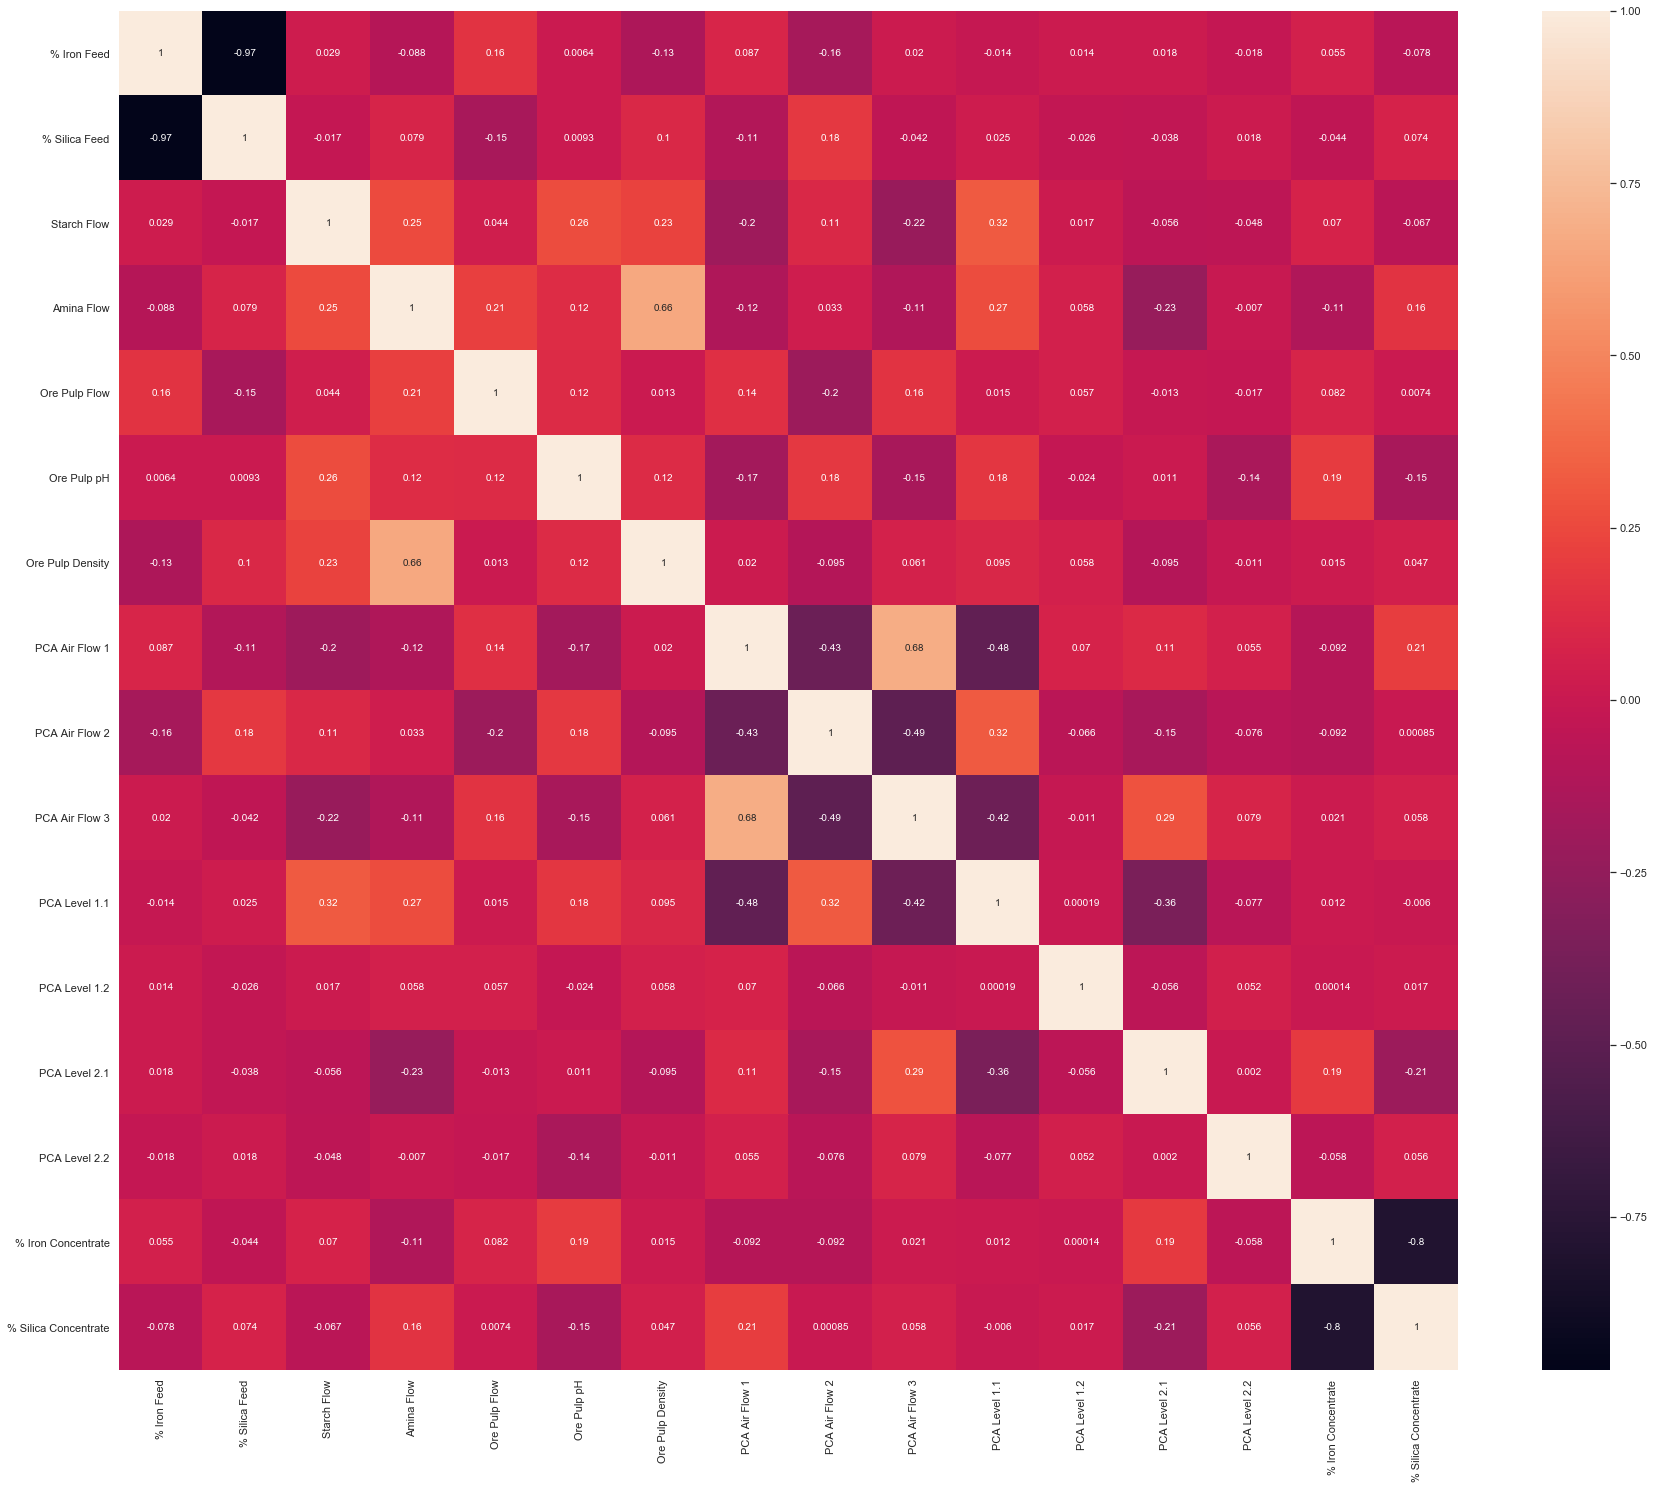

In [42]:
plt.figure(figsize=(30,25))
hm = sns.heatmap(df3.corr(),annot=True)

In [43]:
new1 = df3.drop(['% Iron Concentrate', 'Ore Pulp Flow', 'PCA Air Flow 2','PCA Level 1.1'], axis = 1).copy()
new1.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp pH,Ore Pulp Density,PCA Air Flow 1,PCA Air Flow 3,PCA Level 1.2,PCA Level 2.1,PCA Level 2.2,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,10.0664,1.74,1.678936,1.960631,-0.007463,1.312343,-0.183747,1.31
1,55.2,16.98,3024.41,563.965,10.0672,1.74,1.713537,2.009270,-0.061362,1.143928,-0.204352,1.31
2,55.2,16.98,3043.46,568.054,10.0680,1.74,1.773932,2.003772,0.154693,0.847732,-0.173428,1.31
3,55.2,16.98,3047.36,568.665,10.0689,1.74,1.652554,1.949543,0.055801,0.507921,-0.215997,1.31
4,55.2,16.98,3033.69,558.167,10.0697,1.74,1.693926,2.014497,-0.008825,0.512332,-0.178874,1.31


---
## Linear Regression
---

In [44]:
Y1 = new1['% Silica Concentrate']
X1 = new1.drop(['% Silica Concentrate'], axis=1)
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,train_size=0.7, random_state=10)

In [45]:
model1 = LinearRegression()
model1.fit(X1_train, Y1_train)

saved_model_lr = pickle.dumps(model1)
lr_from_pickle = pickle.loads(saved_model_lr)

In [46]:
acc_lr_train = lr_from_pickle.score(X1_train, Y1_train)
acc_lr_test = lr_from_pickle.score(X1_test, Y1_test)

print('Accuracy on training data =',acc_lr_train)
print('Accuracy on test data =',acc_lr_test)

Accuracy on training data = 0.15095554657274668
Accuracy on test data = 0.1501387973638827


---
## Polynomial Regression
---

In [47]:
poly = PolynomialFeatures(degree=2)
poly_x = poly.fit_transform(X1)

X1p_train, X1p_test, Yp_train, Yp_test = train_test_split(poly_x,Y1,test_size = 0.3,random_state=10)
reg = LinearRegression()

model3 = reg.fit(X1p_train, Yp_train)
saved_model_preg = pickle.dumps(model3)
preg_from_pickle = pickle.loads(saved_model_preg)

In [48]:
acc_preg_train = preg_from_pickle.score(X1p_train, Yp_train)
acc_preg_test = preg_from_pickle.score(X1p_test, Yp_test)

print('Accuracy on training data =',acc_preg_train)
print('Accuracy on test data =',acc_preg_test)

Accuracy on training data = 0.21267672142438676
Accuracy on test data = 0.2116616134654664


---
## Artifical Neural Networks
### NOTE: Please see the other file *"ANN_2.ipynb"* for ANN models and their evaluation

In [49]:
Y1 = new1['% Silica Concentrate'].copy()
X1 = new1.drop(['% Silica Concentrate'], axis=1).copy()

norm_df3=(X1-X1.min())/(X1.max()-X1.min())
norm_df3.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp pH,Ore Pulp Density,PCA Air Flow 1,PCA Air Flow 3,PCA Level 1.2,PCA Level 2.1,PCA Level 2.2
0,0.540799,0.488314,0.479273,0.634233,0.639033,0.660348,0.546896,0.676431,0.485912,0.601462,0.463873
1,0.540799,0.488314,0.480047,0.647351,0.639423,0.660348,0.550507,0.682127,0.478263,0.586329,0.461608
2,0.540799,0.488314,0.483071,0.655564,0.639812,0.660348,0.556812,0.681484,0.508926,0.559714,0.465007
3,0.540799,0.488314,0.483690,0.656791,0.640250,0.660348,0.544142,0.675133,0.494891,0.529181,0.460328
4,0.540799,0.488314,0.481520,0.635705,0.640639,0.660348,0.548460,0.682740,0.485719,0.529577,0.464408


In [50]:
X_0 = norm_df3
y_0 = Y1

In [51]:
X_1 = X_0.sample(n=int(len(X_0)/3))
y_1 = y_0[X_1.index]

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, random_state = 10)

In [52]:
ann_reg = MLPRegressor(random_state=10, hidden_layer_sizes=(100,100), activation='relu', solver='adam', learning_rate = 'invscaling')
ann_reg.fit(X_train, y_train)

saved_model_ann = pickle.dumps(ann_reg)
ann_from_pickle = pickle.loads(saved_model_ann)

In [53]:
y_pred_train = ann_from_pickle.predict(X_train)
y_pred_test = ann_from_pickle.predict(X_test)

acc_ann_train = r2_score(y_train, y_pred_train)
acc_ann_test = r2_score(y_test, y_pred_test)

print('Accuracy on training data =',acc_ann_train)
print('Accuracy on test data =',acc_ann_test)

Accuracy on training data = 0.6095640739998012
Accuracy on test data = 0.5862966780146704


---
## Decision Tree Classifer
---

Text(0.5, 0, '% Silica Concentrate')

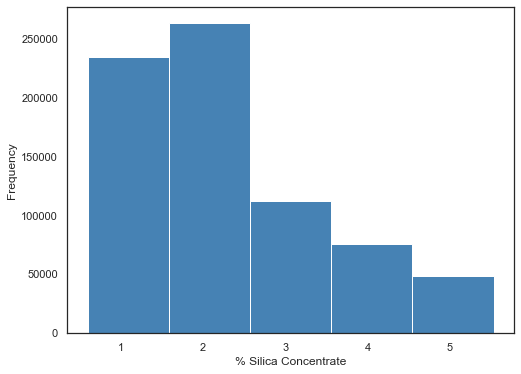

In [54]:
df4=df3
hp = df4["% Silica Concentrate"].plot(kind='hist',figsize=(8,6),bins=int(5),color='steelblue')
hp.set_xlabel("% Silica Concentrate")

In [55]:
# [0,1]: very good
# (1,2]: good
# (2,3]: medium
# (3,4]: bad
# (4,inf): worst quality
df4['Quality']=pd.cut(x=df4['% Silica Concentrate'],bins=[0,1,2,3,4,100],labels=['0','1','2','3','4'])

In [56]:
df4.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,PCA Air Flow 1,PCA Air Flow 2,PCA Air Flow 3,PCA Level 1.1,PCA Level 1.2,PCA Level 2.1,PCA Level 2.2,% Iron Concentrate,% Silica Concentrate,Quality
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,1.678936,-2.45599,1.960631,1.083831,-0.007463,1.312343,-0.183747,66.91,1.31,1
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,1.713537,-2.45599,2.009270,1.093430,-0.061362,1.143928,-0.204352,66.91,1.31,1
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,1.773932,-2.45599,2.003772,0.914977,0.154693,0.847732,-0.173428,66.91,1.31,1
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,1.652554,-2.45599,1.949543,0.926126,0.055801,0.507921,-0.215997,66.91,1.31,1
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,1.693926,-2.45599,2.014497,0.920496,-0.008825,0.512332,-0.178874,66.91,1.31,1


In [57]:
df4["Quality"].value_counts()

1    358279
2    181301
3     99025
4     85600
0     10906
Name: Quality, dtype: int64

In [58]:
y = df4['Quality'].copy()

In [59]:
X = df4.drop(['% Iron Concentrate','% Silica Concentrate','Quality','Ore Pulp Flow','PCA Air Flow 2','PCA Level 1.1'],axis = 1).copy()
X.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp pH,Ore Pulp Density,PCA Air Flow 1,PCA Air Flow 3,PCA Level 1.2,PCA Level 2.1,PCA Level 2.2
0,55.2,16.98,3019.53,557.434,10.0664,1.74,1.678936,1.960631,-0.007463,1.312343,-0.183747
1,55.2,16.98,3024.41,563.965,10.0672,1.74,1.713537,2.009270,-0.061362,1.143928,-0.204352
2,55.2,16.98,3043.46,568.054,10.0680,1.74,1.773932,2.003772,0.154693,0.847732,-0.173428
3,55.2,16.98,3047.36,568.665,10.0689,1.74,1.652554,1.949543,0.055801,0.507921,-0.215997
4,55.2,16.98,3033.69,558.167,10.0697,1.74,1.693926,2.014497,-0.008825,0.512332,-0.178874


In [60]:
y=y.astype(np.float64)
y.unique()

array([1., 2., 3., 4., 0.])

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state = 10)

dt = DecisionTreeClassifier(random_state = 10)
dt = dt.fit(X_train, Y_train)

saved_model_dt = pickle.dumps(dt)
dt_from_pickle = pickle.loads(saved_model_dt)

In [62]:
acc_train = dt_from_pickle.score(X_train, Y_train)
acc_test = dt_from_pickle.score(X_test, Y_test)

print('Accuracy on training data =',acc_train)
print('Accuracy on test data =',acc_test)

Accuracy on training data = 0.9998328724369725
Accuracy on test data = 0.9462033065196296


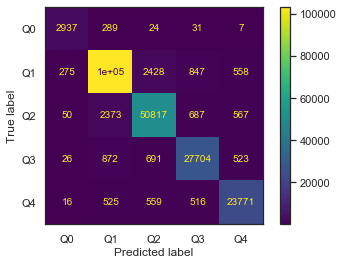

In [63]:
plot_confusion_matrix(dt,X_test, Y_test, display_labels=["Q0", "Q1", "Q2",'Q3','Q4'])

---
## Random Forest
---

In [64]:
Y4=df4['% Silica Concentrate'].copy()
X4=df4.drop(['% Iron Concentrate','% Silica Concentrate','Quality','Ore Pulp Flow','PCA Air Flow 2','PCA Level 1.1'],axis=1).copy()

X4_train, X4_test, y4_train, y4_test = train_test_split(X4,Y4,test_size = 0.3,random_state=10)

from sklearn.ensemble import RandomForestRegressor

In [65]:
rfr=RandomForestRegressor(n_estimators=10, random_state=10)
rfr.fit(X4_train, y4_train)

saved_model_rf = pickle.dumps(rfr)
rf_from_pickle = pickle.loads(saved_model_rf)

In [66]:
y4_pred_train = rf_from_pickle.predict(X4_train)
y4_pred_test = rf_from_pickle.predict(X4_test)

acc1 = r2_score(y4_train,y4_pred_train)
acc2 = r2_score(y4_test,y4_pred_test)
print('Accuracy on training data =',acc1)
print('Accuracy on test data =',acc2)

Accuracy on training data = 0.9876135805820111
Accuracy on test data = 0.9398787438146904


In [67]:
arr = pd.DataFrame(columns=['Max Depth','Accuracy on train', 'Accuracy on test'])
for i in range(2,70,2):
    rfr=RandomForestRegressor(n_estimators=7, max_depth=i, random_state=10)
    rfr.fit(X4_train, y4_train)
    
    y4_pred_train = rfr.predict(X4_train)
    y4_pred_test = rfr.predict(X4_test)
    
    acc1 = r2_score(y4_train, y4_pred_train)
    acc2 = r2_score(y4_test, y4_pred_test)
    
    arr = arr.append({'Max Depth':i,'Accuracy on train':acc1,'Accuracy on test':acc2}, ignore_index=True)

Text(0.5, 1.0, 'Accuracy vs Max Depth')

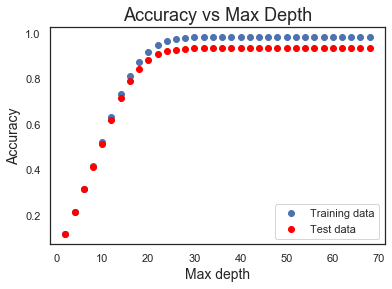

In [69]:
arr['Max Depth'].astype(np.int64)

fig, ax = plt.subplots()
ax.plot(arr['Max Depth'],arr['Accuracy on train'], 'bo')
ax.plot(arr['Max Depth'],arr['Accuracy on test'], 'bo', color='red')

ax.legend(["Training data","Test data"],loc='best')
ax.set_xlabel('Max depth',fontsize=14)
ax.set_ylabel('Accuracy',fontsize=14)
ax.set_title('Accuracy vs Max Depth',fontsize=18)

In [70]:
est_check = pd.DataFrame(columns=['N_estimators','Accuracy on train', 'Accuracy on test'])
for i in range(2,30,2):
    rfr=RandomForestRegressor(n_estimators=i, max_depth=18, random_state=10)
    rfr.fit(X4_train, y4_train)
    
    y4_pred_train = rfr.predict(X4_train)
    y4_pred_test = rfr.predict(X4_test)
    
    acc11 = r2_score(y4_train, y4_pred_train)
    acc22 = r2_score(y4_test, y4_pred_test)
    
    est_check = est_check.append({'N_estimators':i,'Accuracy on train':acc11,'Accuracy on test':acc22}, ignore_index=True)

Text(0.5, 1.0, 'Accuracy vs # of estimators')

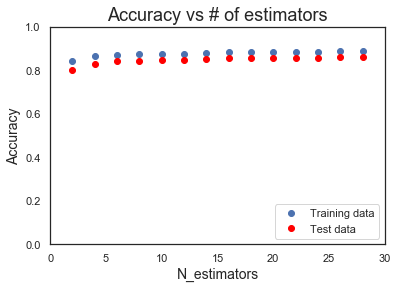

In [72]:
est_check['N_estimators'].astype(np.int64)

fig, ax = plt.subplots()
plt.xlim(0, 30)
plt.ylim(0, 1)

ax.plot(est_check['N_estimators'],est_check['Accuracy on train'], 'bo')
ax.plot(est_check['N_estimators'],est_check['Accuracy on test'], 'bo', color='red')

ax.legend(["Training data","Test data"],loc='lower right')
ax.set_xlabel('N_estimators',fontsize=14)
ax.set_ylabel('Accuracy',fontsize=14)
ax.set_title('Accuracy vs # of estimators',fontsize=18)